In [1]:
import fastai
from fastai.text.all import *
import os
from PIL import Image
from pathlib import Path
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle
from collections import Counter
from seaborn import barplot
import shutil

In [2]:
PIXEL_COL_PATH = Path('/home/ibukey/ttmp/primus-txt/')

In [3]:
whitespace_tokenizer = BaseTokenizer()

In [5]:
data_loader = TextDataLoaders.from_folder(
    path=PIXEL_COL_PATH, 
    is_lm=True, valid_pct=0.1, 
    tok_tfm=whitespace_tokenizer)

Rules: []


In [6]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(PIXEL_COL_PATH), 
    pretrained=True,
    wd=0.1).to_fp16()

In [8]:
learn.load('awdlstm_model')

In [41]:
SEED = "00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 00000000000100000000000000000100000000000000000100000000000000000100000000000000000100000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000001111111110000000000000001110000000000000001110011000000000001110000000000 00000000001110000000111111111111000000000000001110000000000000001110011000000000001110000000000 00000000001110000011111111111111100000000000001110000000000000001110111000000000001110000000000 00000000001110000111111111111111110000000000001110000000000000001110111000000000001110000000000 00000000001110011111111111111111111000000000001110000000000000001111110000000000001110000000000 00000000001110111111100011111111111100000000001110000000000000001111110000000000001110000000000 00000000001110111110000011111111111100000000001110000000000000001111110000000000001110000000000 00000000001111111100000111111111111100000000001110000000000000001111100000000000001110000000000 00000000001111111100000111111111111110000000001110000000000000001111100000000000001110000000000 00000000001111111000001111111111111110000000001110000000000000001111000000000000001110000000000 00000000001111111000001111111111111110000000001110000000000000001111000000000000001110000000000 00000000001111110000001111111111111110000000001110000000000000001110000000000000001110000000000 00000000001111110000001111111111111110000000001110000000000000011110000000000000001110000000000 00000000001111110000001111111111111100000000001110000000000000011110000000000000001110000000000 00000000001111110000001111111111111100000000001110000000000000111110000000000000001110000000000 00000000001111110000000111111111111000000000001110000000000001111110000000000000001110000000000 00000000001111110000000011111111110000000000001110000000000001111110000000000000001110000000000 00000000001111110000000001111111100000000000001110000000000011111110000000000000001110000000000 00000000001111110000000000001110000000000000001110000000000111111110000000000000001110000000000 00000000001111110000000000001110000000000000001110000000001111101110000000000000001110000000000 00000000001111111000000000001110000000000000001110000000011111101110000000000000001110000000000 00000000001111111000000000001110000000000000001110000000111111001110000000000000001110000000000 00000000001111111100000000001110000000000000001110000001111110001110000000000000001110000000000 00000000001111111100000000001110000000000000001110000111111100001110000000000000001110000000000 00000000001111111110000000001110000000000000001110011111111100001110000000000000001110000000000 00000000001111111111000000001110000000000000001111111111111000001110000000000000001110000000000 00000000001111111111100000001110000000000000001111111111110000001110000000000000001110000000000 00000000001111111111111000001110000000000000111111111111100000001110000000000000001110000000000 00000000001111111111111111111110000000001111111111111111000000001110000000000000001110000000000 00000000001110111111111111111111111111111111111111111110000000001110000000000000001110000000000 00000000001110011111111111111111111111111111111111111000000000001110000000000000001110000000000 00000000001110001111111111111111111111111111111111110000000000001110000000000000001110000000000 00000000001110000111111111111111111111111111111111100000000000001110000000000000001110000000000 00000000001110000011111111111111111111111111111110000000000000001110000000000000001110000000000 00000000001110000001111111111111111111111111111110000000000000001110000000000000001110000000000 00000000001110000000011111111111111111111111101110000000000000001110000000000000001110000000000 00000000001110000000000011111111111111111100001110000000000000001110000000000000001110000000000 00000000001110000000000000011111111111000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000011111000001110000111110000001110000000000000001110000000000000001110000000000 00000000001110000111111100001110001111111000001110000000000000001110000000000000001110000000000 00000000001110001111111100001110001111111000001110000000000000001110000000000000001110000000000 00000000001110001111111110001110011111111100001110000000000000001110000000000000001110000000000 00000000001110001111111110001110011111111100001110000000000000001110000000000000001110000000000 00000000001110001111111100001110011111111000001110000000000000001110000000000000001110000000000 00000000001110000111111100001110001111111000001110000000000000001110000000000000001110000000000 00000000001110000011111000001110000111110000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000 00000000001110000000000000001110000000000000001110000000000000001110000000000000001110000000000"

In [42]:
len(SEED.split())

67

In [113]:
def tokens_to_image(tokens):
    img_array = np.zeros((len(tokens[0]), len(tokens)), dtype=np.uint8)
    for j, column in enumerate(tokens):
        for i, char in enumerate(column):
            img_array[i, j] = (1-int(char)) * 255
    img = Image.fromarray(img_array)
    return img

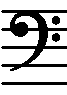

In [114]:
seed_tokens = SEED.split()
seed_tokens = [token for token in seed_tokens]
seed_img = tokens_to_image(seed_tokens)
# seed_img.show()

In [115]:
# tokens_to_image(pred_tokens).save('/home/ibukey/ttmp/pixel-cols-preds/g2_0.png')

In [116]:
for i in range(7):
    pred = learn.predict(SEED, 1000, temperature=.8, no_unk=True)
    pred_tokens = seed_tokens + [token for token in pred.split() if token.isnumeric()]
    tokens_to_image(pred_tokens).save('/home/ibukey/ttmp/pixel-cols-preds/f_{}.png'.format(i))

IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [48]:
Image.fromarray(np.array(Image.open('/home/ibukey/ttmp/pixel-cols-preds/f_5.png'))[:,67:]).save('/home/ibukey/ttmp/pixel-cols-preds/f_4.png')
